# Meeting 08 - Abstract Syntax and Parsing

Bor-Yuh Evan Chang  
Thursday, September 19, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

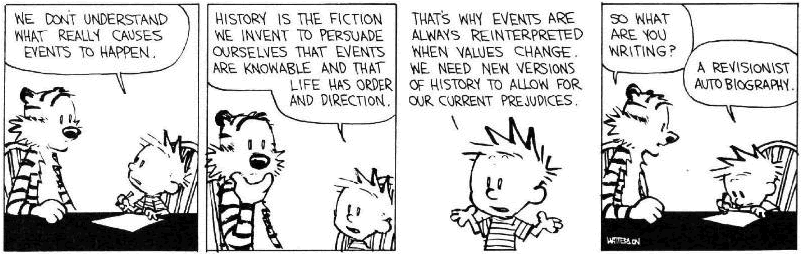

What questions does your neighbor have?

[ In-Class Slides](in-class/meeting07-concrete-syntax.pdf)<br/> [ Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/concrete-syntax.html)

## Announcements

-   HW 2 due this ~~Friday~~ Monday 9/23 6pm

## Today

-   Revisit last bit of Concrete Syntax
-   [Abstract
    Syntax](https://csci3155.cs.colorado.edu/pppl-course/book/abstract-syntax.html)
-   Triage Your Questions
    -   Using VSCode or the terminal to test your code (on
        coding.csel.io)?
    -   Auto-testing with GitHub Actions?
    -   Lab 1?
-   Revisit and Go Deeper On:
    -   Concrete Syntax (Meeting 07), if time permits

## Questions?

-   Review:
    -   How do you show that a *grammar* is *ambiguous*?

## Questions?

## One-Slide Review

Concrete syntax is …

Abstract syntax is …

Parsers convert …, which have deal with …

… and … are ways to to describe and deal with a common form of
ambiguity.

## An Ambiguous Grammar

$$\begin{array}{rrrl} \text{expressions} & e & \mathrel{::=}& n \mid e\;\texttt{/}\;e \mid e\;\texttt{-}\;e \end{array}$$

## A Related Unambiguous Grammar

$$\begin{array}{rrrl}
\text{expressions $\texttt{Expr}$} & e & \mathrel{::=}&
  \texttt{N(} n \texttt{)} \\
  & & \mid& \texttt{Divide(}e_1\texttt{,}\;e_2\texttt{)} \\
  & & \mid& \texttt{Minus(}e_1\texttt{,}\;e_2\texttt{)} \\
\text{integers} & n
\end{array}$$

Try hard to read this as concrete syntax. It is unambiguous, right? Why?

## Abstract Syntax Trees

``` scala
sealed trait Expr                                  // e ::=
case class N(n: Int) extends Expr                  //   n
case class Divide(e1: Expr, e2: Expr) extends Expr // | e1 / e2
case class Minus(e1: Expr, e2: Expr) extends Expr  // | e1 - e2
```

## Abstract Syntax Trees

``` scala
Minus(N(10), Divide(N(10), N(10)))
```

## Abstract Syntax Trees versus Parse Trees

# Parsing

Take a Theory of Computation course for more language theory. We focus
here on the practical aspect of reading and writing BNF grammars.

There are also many advanced parser libraries and generator tools. You
might use one in a Compiler Construction course.

## An Ambiguous Grammar

$$
\begin{array}{rrrl}
\text{expressions} & e & \mathrel{::=}& n \mid e + e \\
\text{numbers} &  n
\end{array}
$$

In [1]:
sealed trait Expr                                // e ::=
case class N(n: Double) extends Expr             //   n
case class Plus(e1: Expr, e2: Expr) extends Expr // | e1 + e2

defined trait Expr
defined class N
defined class Plus

## Recursive-Descent Parsing

Automate the top-down, *leftmost parsing derivation*.

## Recursive-Descent Parsing

Two rules:

## Combinator Parsing

In [2]:
import $ivy.`org.scala-lang.modules::scala-parser-combinators:2.4.0`

Downloaded https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.13.13/scala-library-2.13.13.pom
Downloaded https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.13.13/scala-library-2.13.13-sources.jar
Downloaded https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.13.13/scala-library-2.13.13.jar


import $ivy.$                                                       

What’s a *combinator*?

## Restricting the Concrete Syntax

term ::= num | ( expr )

expr ::= term + term

## Let’s Implement a Parser!

In [16]:
object ExprParser extends scala.util.parsing.combinator.RegexParsers {
  def term: Parser[Expr] =
    num ^^ { (n: String) => N(n.toDouble) } |
    "(" ~ expr ~ ")" ^^ { case _ ~ e ~ _ => e }
    
  def expr: Parser[Expr] =
    term ~ "+" ~ term ^^ { case e1 ~ _ ~ e2 => Plus(e1, e2) }
    
  def num: Parser[String] =
    """-?(\d+(\.\d*)?|\d*\.\d+)([eE][+-]?\d+)?""".r
    
  def parse(s: String): Either[String, Expr] = parseAll(term, s) match {
      case Success(s, _) => Right(s)
      case Failure(msg, _) => Left(s"Failure: $msg")
      case Error(msg, _) => Left(s"Error: $msg")
  }
}

defined object ExprParser

In [19]:
ExprParser.parse("3")
ExprParser.parse("don't parse me")
ExprParser.parse("(3 + 4)")
ExprParser.parse("((3 + 4) + 5)")
ExprParser.parse("3 + 4")


res18_0: Either[String, Expr] = Right(N(3.0))
res18_1: Either[String, Expr] = Left("Failure: '(' expected but 'd' found")
res18_2: Either[String, Expr] = Right(Plus(N(3.0), N(4.0)))
res18_3: Either[String, Expr] = Right(Plus(Plus(N(3.0), N(4.0)), N(5.0)))
res18_4: Either[String, Expr] = Left("Failure: end of input expected")